
# Lung damage - linear regression model


In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from urls import lung_damage_url

In [2]:
#CSV are read into a dataframe
#Data is read from AWS
lung_damage_df = pd.read_csv(lung_damage_url)
lung_damage_df

,individual_id,age,sex,weight_in_kg,height_in_meters,cigarettes_a_week,alcohol_beverages_a_week,workout_sessions_a_week,ancestry_cancer_flag,ancestry_diabetes_flag,ancestry_overweight_flag,oxigen_measure,co2_measure,lung_damage
0,1,42,M,70.3,1.65,0,1,6,True,False,False,57.2,60.0,0.4157
1,2,35,M,60.0,1.66,0,5,2,False,False,False,48.5,71.8,0.2391
2,3,46,F,70.6,1.58,0,4,0,True,False,False,64.9,36.3,0.5526
3,4,45,M,87.0,1.75,0,0,5,False,False,False,46.8,51.2,0.5636
4,5,29,M,68.8,1.66,0,3,0,False,False,True,36.1,68.6,0.3898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,45,M,74.3,1.75,0,5,0,False,False,False,57.0,72.8,0.3442
9996,9997,50,M,61.6,1.69,0,4,0,False,False,False,45.4,83.0,0.2302
9997,9998,38,F,67.3,1.63,0,4,0,False,False,False,49.0,76.1,0.4002
9998,9999,37,M,85.5,1.63,0,1,2,True,True,False,69.5,65.4,0.8532


In [3]:
#We drop individual_id as this doesn't provide any relevant information to the model
lung_damage_df = lung_damage_df.drop(['individual_id'], axis = 'columns')
lung_damage_df

,age,sex,weight_in_kg,height_in_meters,cigarettes_a_week,alcohol_beverages_a_week,workout_sessions_a_week,ancestry_cancer_flag,ancestry_diabetes_flag,ancestry_overweight_flag,oxigen_measure,co2_measure,lung_damage
0,42,M,70.3,1.65,0,1,6,True,False,False,57.2,60.0,0.4157
1,35,M,60.0,1.66,0,5,2,False,False,False,48.5,71.8,0.2391
2,46,F,70.6,1.58,0,4,0,True,False,False,64.9,36.3,0.5526
3,45,M,87.0,1.75,0,0,5,False,False,False,46.8,51.2,0.5636
4,29,M,68.8,1.66,0,3,0,False,False,True,36.1,68.6,0.3898
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,45,M,74.3,1.75,0,5,0,False,False,False,57.0,72.8,0.3442
9996,50,M,61.6,1.69,0,4,0,False,False,False,45.4,83.0,0.2302
9997,38,F,67.3,1.63,0,4,0,False,False,False,49.0,76.1,0.4002
9998,37,M,85.5,1.63,0,1,2,True,True,False,69.5,65.4,0.8532



### Testing if a data present a normal distribution


C:\Users\cesar\AppData\Local\Temp/ipykernel_33872/2778530183.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  lung_damage_df.hist(ax = ax)


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'weight_in_kg'}>,
        <AxesSubplot:title={'center':'height_in_meters'}>],
       [<AxesSubplot:title={'center':'cigarettes_a_week'}>,
        <AxesSubplot:title={'center':'alcohol_beverages_a_week'}>,
        <AxesSubplot:title={'center':'workout_sessions_a_week'}>],
       [<AxesSubplot:title={'center':'oxigen_measure'}>,
        <AxesSubplot:title={'center':'co2_measure'}>,
        <AxesSubplot:title={'center':'lung_damage'}>]], dtype=object)

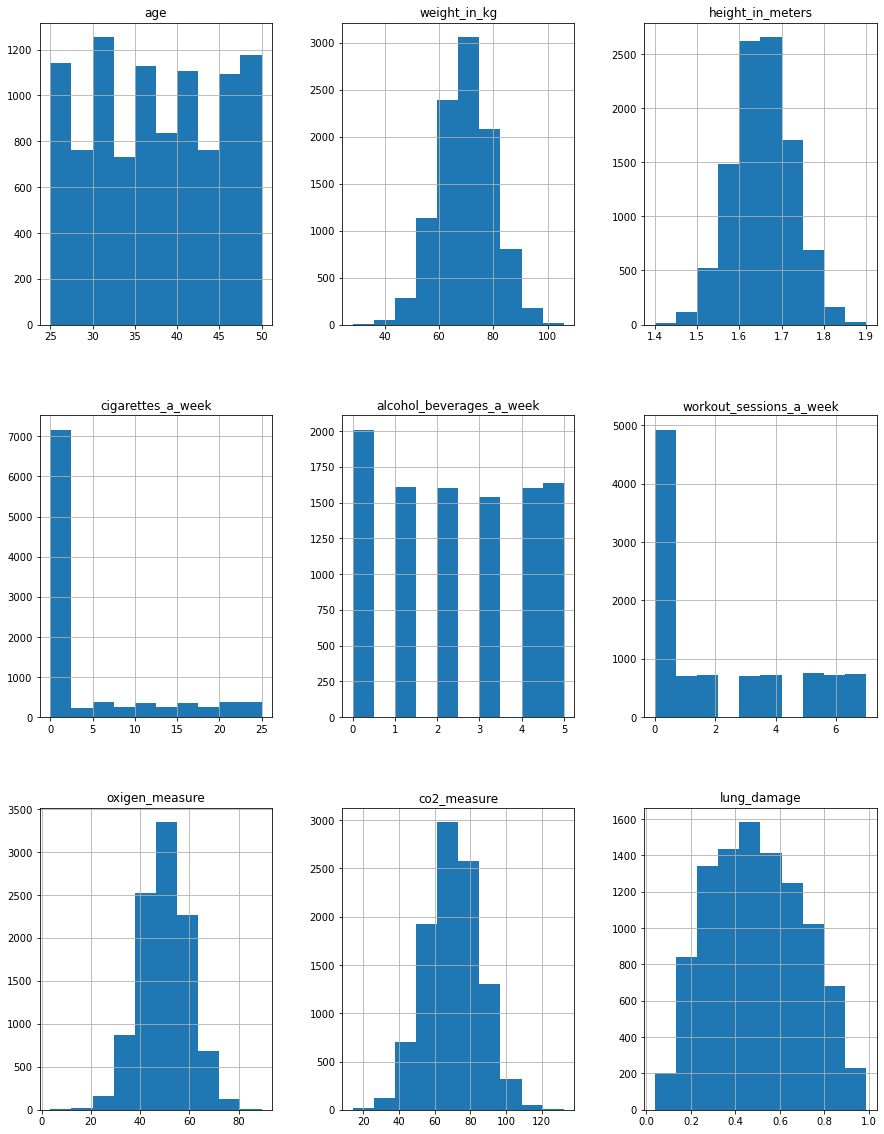

In [4]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
lung_damage_df.hist(ax = ax)
#lung_damage_df.hist()


### Certain values are normally distributed, which suggest linear regression



## Correlation analysis


[Text(0.5, 0, 'age'),
 Text(1.5, 0, 'weight_in_kg'),
 Text(2.5, 0, 'height_in_meters'),
 Text(3.5, 0, 'cigarettes_a_week'),
 Text(4.5, 0, 'alcohol_beverages_a_week'),
 Text(5.5, 0, 'workout_sessions_a_week'),
 Text(6.5, 0, 'oxigen_measure'),
 Text(7.5, 0, 'co2_measure'),
 Text(8.5, 0, 'lung_damage')]

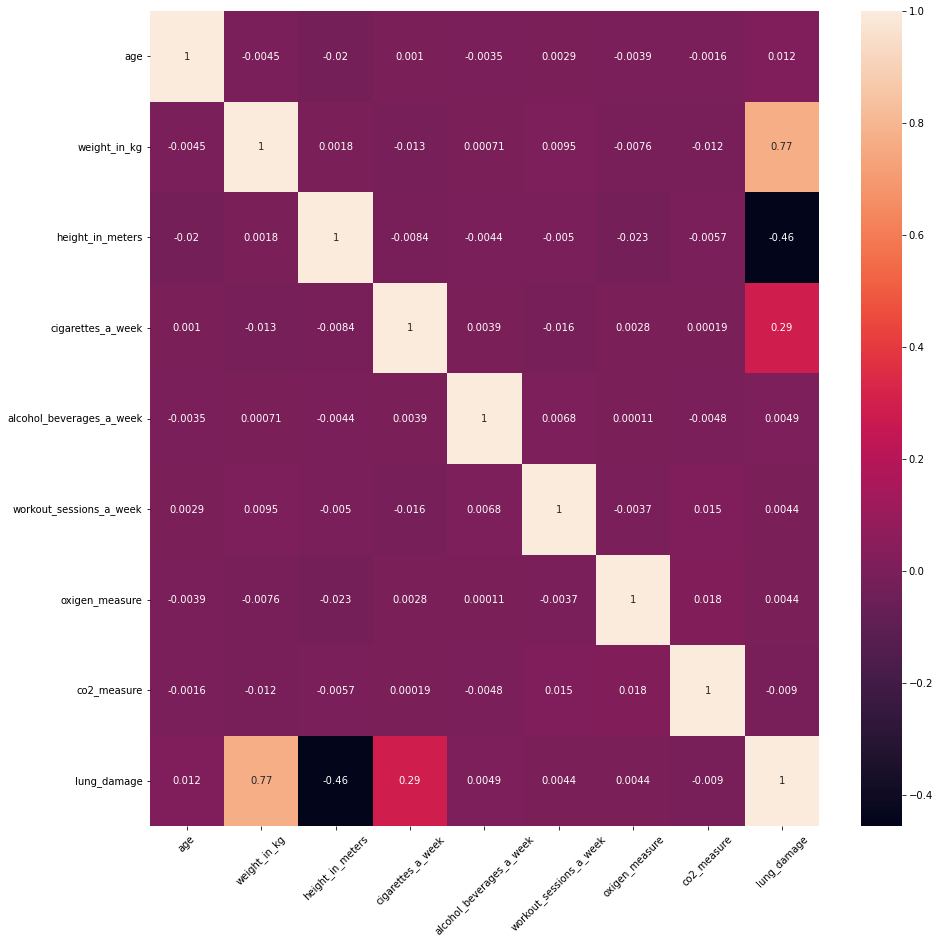

In [5]:
fig, axes = plt.subplots(ncols=1, nrows=1,figsize=(15,15))
corr_matrix = lung_damage_df.select_dtypes(include=['int64', 'float64']).corr(method = 'pearson')
sns.heatmap(corr_matrix, annot = True)
axes.set_xticklabels(labels=axes.get_xticklabels(),rotation=45)


### Lung damage stronly correlates to: 1. Weight, 2. height and 3. cigarettes a week


## Linear regresion model 1 - using all features

In [6]:
#One hot encoding by dummy variables
sex_dummy = pd.get_dummies(lung_damage_df.sex)
cancer_dummy = pd.get_dummies(lung_damage_df.ancestry_cancer_flag,prefix='cancer') 
diabetes_dummy = pd.get_dummies(lung_damage_df.ancestry_diabetes_flag,prefix='diabetes')
overweight_dummy = pd.get_dummies(lung_damage_df.ancestry_overweight_flag,prefix='overweight')

In [7]:
dummies = pd.concat([sex_dummy, cancer_dummy, diabetes_dummy, overweight_dummy], axis = 'columns')
merged_lung_dummies = pd.concat([lung_damage_df, dummies], axis = 'columns')

In [8]:
X = merged_lung_dummies.drop(['sex', 'ancestry_cancer_flag', 'ancestry_diabetes_flag',
                                        'ancestry_overweight_flag', 'F', 'cancer_False', 'diabetes_False',
                                         'overweight_False', 'lung_damage'], axis = 'columns') 


y = lung_damage_df['lung_damage'].to_frame()

print("X")
print(X)
print(X.shape)
print("y")
print(y)
print(y.shape)

X
      age  weight_in_kg  height_in_meters  cigarettes_a_week  \
0      42          70.3              1.65                  0   
1      35          60.0              1.66                  0   
2      46          70.6              1.58                  0   
3      45          87.0              1.75                  0   
4      29          68.8              1.66                  0   
...   ...           ...               ...                ...   
9995   45          74.3              1.75                  0   
9996   50          61.6              1.69                  0   
9997   38          67.3              1.63                  0   
9998   37          85.5              1.63                  0   
9999   34          82.6              1.72                 18   

      alcohol_beverages_a_week  workout_sessions_a_week  oxigen_measure  \
0                            1                        6            57.2   
1                            5                        2            48.5   
2   

In [9]:
#Algorithm
l_reg = linear_model.LinearRegression()

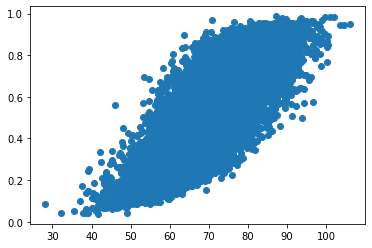

In [10]:
#Looking if relation is appropiate for linear regression
#We can only make a relationship for one feature at the time
plt.scatter(X['weight_in_kg'], y) 
plt.show()

#We want to know is if the data is appropiate for linear regresion, which is

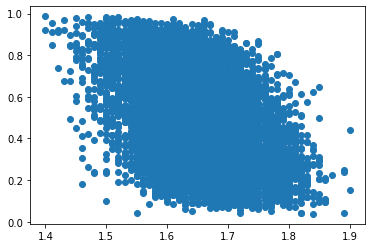

In [11]:
l_reg = linear_model.LinearRegression()

plt.scatter(X['height_in_meters'], y)
plt.show()


### This suggest data is linear, so linear regression will be fine


In [12]:
#separating between the testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1234, shuffle = True)

In [13]:
#train
model = l_reg.fit(X_train, y_train)

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)

print("predictions: ", predictions)
print("R^2: ", l_reg.score(X, y))
print("mse: ", mse)
print("coeff: ", l_reg.coef_)
print("intercept: ", l_reg.intercept_)

predictions:  [[0.93242556]
 [0.70960976]
 [0.45091427]
 ...
 [0.7983847 ]
 [0.47001117]
 [0.59622372]]
R^2:  0.9792732521816737
mse:  0.0009237937195200156
coeff:  [[ 2.43615191e-05  1.60672827e-02 -1.35944722e+00  8.62040093e-03
   2.69780971e-05  2.78971986e-05  4.77077269e-05 -3.24909803e-05
   2.16604935e-04  7.21697769e-04  1.57238029e-01  3.90796809e-04]]
intercept:  [1.54883834]


In [14]:
#lung_damage_df[lung_damage_df.lung_damage > 0.8]
#lung_damage_df[lung_damage_df.lung_damage < 0.3]

In [15]:
test_de_prueba = [66, 91.9, 1.63, 20, 5, 0, 50, 70, 1, 1, 1, 0]
test_de_prueba = [test_de_prueba]

test_de_prueba = np.array(test_de_prueba).reshape(1,-1)
prediction = model.predict(test_de_prueba)
print(prediction)

[[1.14196077]]



***Linear regression model predicted a value greater than 1. An arbitrary fix may be suitable***


In [16]:
test_de_prueba = [35, 70.9, 1.75, 2, 5, 0, 50, 60, 1, 0, 0, 0]
test_de_prueba = [test_de_prueba]

test_de_prueba = np.array(test_de_prueba).reshape(1,-1)
prediction = model.predict(test_de_prueba)
print(prediction)

[[0.32785693]]



***Last two predictions are reasonable***



## Linear regresion model 2

### 3 variables: Weight, height and cigarettes per week


In [17]:
X= pd.concat([lung_damage_df.weight_in_kg, lung_damage_df.height_in_meters, 
                 lung_damage_df.cigarettes_a_week], axis = 'columns')
y = lung_damage_df['lung_damage'].to_frame()

print("X")
print(X)
print(X.shape)
print("y")
print(y)
print(y.shape)

X
      weight_in_kg  height_in_meters  cigarettes_a_week
0             70.3              1.65                  0
1             60.0              1.66                  0
2             70.6              1.58                  0
3             87.0              1.75                  0
4             68.8              1.66                  0
...            ...               ...                ...
9995          74.3              1.75                  0
9996          61.6              1.69                  0
9997          67.3              1.63                  0
9998          85.5              1.63                  0
9999          82.6              1.72                 18

[10000 rows x 3 columns]
(10000, 3)
y
      lung_damage
0          0.4157
1          0.2391
2          0.5526
3          0.5636
4          0.3898
...           ...
9995       0.3442
9996       0.2302
9997       0.4002
9998       0.8532
9999       0.7094

[10000 rows x 1 columns]
(10000, 1)


In [18]:
l_reg = linear_model.LinearRegression()

In [19]:
#separating between the testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1234, shuffle = True)

In [20]:
#train
model = l_reg.fit(X_train, y_train)

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)

print("predictions: ", predictions)
print("R^2: ", l_reg.score(X, y))
print("mse: ", mse)
print("coeff: ", l_reg.coef_)
print("intercept: ", l_reg.intercept_)

predictions:  [[0.9642608 ]
 [0.73978894]
 [0.48201241]
 ...
 [0.8293483 ]
 [0.50140466]
 [0.62834863]]
R^2:  0.8878097514398119
mse:  0.00487656608813481
coeff:  [[ 0.0160809  -1.3578138   0.00860991]]
intercept:  [1.5781583]


In [21]:
test_de_prueba = [91.9, 1.63, 20]
test_de_prueba = [test_de_prueba]

test_de_prueba = np.array(test_de_prueba).reshape(1,-1)
prediction = model.predict(test_de_prueba)
print(prediction)

[[1.01495492]]


In [22]:
test_de_prueba = [70.9, 1.75, 2]
test_de_prueba = [test_de_prueba]

test_de_prueba = np.array(test_de_prueba).reshape(1,-1)
prediction = model.predict(test_de_prueba)
print(prediction)

[[0.35933999]]



### *Linear regresion model 1 gave better results*



## Linear regresion model 1* 

#### Certain part of the data will not be considered for the split, as it will be used to test the predictions

In [23]:
#One hot encoding by dummy variables
sex_dummy = pd.get_dummies(lung_damage_df.sex)
cancer_dummy = pd.get_dummies(lung_damage_df.ancestry_cancer_flag,prefix='cancer') 
diabetes_dummy = pd.get_dummies(lung_damage_df.ancestry_diabetes_flag,prefix='diabetes')
overweight_dummy = pd.get_dummies(lung_damage_df.ancestry_overweight_flag,prefix='overweight')

In [24]:
dummies = pd.concat([sex_dummy, cancer_dummy, diabetes_dummy, overweight_dummy], axis = 'columns')
merged_lung_dummies = pd.concat([lung_damage_df, dummies], axis = 'columns')

In [25]:
X = merged_lung_dummies.drop(['sex', 'ancestry_cancer_flag', 'ancestry_diabetes_flag',
                                        'ancestry_overweight_flag', 'F', 'cancer_False', 'diabetes_False',
                                         'overweight_False', 'lung_damage'], axis = 'columns') 

X = X.iloc[:9000] #se dejan fuera los ultimos 1000 datos
X_left = lung_damage_df.iloc[9000:10000] #los datos que quedan se guardan aqui
y = lung_damage_df['lung_damage'].to_frame()
y = y.iloc[:9000]
print("X")
print(X)
print(X.shape)
print("y")
print(y)
print(y.shape)

X
      age  weight_in_kg  height_in_meters  cigarettes_a_week  \
0      42          70.3              1.65                  0   
1      35          60.0              1.66                  0   
2      46          70.6              1.58                  0   
3      45          87.0              1.75                  0   
4      29          68.8              1.66                  0   
...   ...           ...               ...                ...   
8995   33          62.3              1.70                  4   
8996   37          70.4              1.60                  0   
8997   42          69.2              1.79                  0   
8998   50          51.3              1.65                  0   
8999   26          73.3              1.60                  0   

      alcohol_beverages_a_week  workout_sessions_a_week  oxigen_measure  \
0                            1                        6            57.2   
1                            5                        2            48.5   
2   

In [26]:
#Algorithm
l_reg = linear_model.LinearRegression()

In [27]:
#separating between the testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1785, shuffle = True)

In [28]:
#train
model = l_reg.fit(X_train, y_train)

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)

print("predictions: ", predictions)
print("R^2: ", l_reg.score(X, y))
print("mse: ", mse)
print("coeff: ", l_reg.coef_)
print("intercept: ", l_reg.intercept_)

predictions:  [[0.46646301]
 [0.24434368]
 [0.71188913]
 ...
 [0.46155287]
 [0.25404845]
 [0.58611086]]
R^2:  0.9792889268569628
mse:  0.0009363014934790182
coeff:  [[ 4.41936249e-05  1.60546795e-02 -1.36475466e+00  8.58038632e-03
   3.25177643e-04  7.08036905e-06  8.34519765e-05 -2.52856766e-05
   3.56334141e-04 -8.21012938e-05  1.57126546e-01  1.00722448e-03]]
intercept:  [1.55504396]



### R-squared is 97%, which is a great value. The data is ideal in this model.



## Testing predictions vs real


In [29]:
X

,age,weight_in_kg,height_in_meters,cigarettes_a_week,alcohol_beverages_a_week,workout_sessions_a_week,oxigen_measure,co2_measure,M,cancer_True,diabetes_True,overweight_True
0,42,70.3,1.65,0,1,6,57.2,60.0,1,1,0,0
1,35,60.0,1.66,0,5,2,48.5,71.8,1,0,0,0
2,46,70.6,1.58,0,4,0,64.9,36.3,0,1,0,0
3,45,87.0,1.75,0,0,5,46.8,51.2,1,0,0,0
4,29,68.8,1.66,0,3,0,36.1,68.6,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8995,33,62.3,1.70,4,4,0,42.3,54.9,1,0,1,0
8996,37,70.4,1.60,0,3,6,53.6,73.6,0,1,1,0
8997,42,69.2,1.79,0,5,7,68.0,105.3,0,0,1,0
8998,50,51.3,1.65,0,1,7,64.1,72.6,0,0,0,0


In [30]:
#lung_damage_df[lung_damage_df.lung_damage > 0.8]
#lung_damage_df[lung_damage_df.lung_damage < 0.3]
X_left

,age,sex,weight_in_kg,height_in_meters,cigarettes_a_week,alcohol_beverages_a_week,workout_sessions_a_week,ancestry_cancer_flag,ancestry_diabetes_flag,ancestry_overweight_flag,oxigen_measure,co2_measure,lung_damage
9000,32,F,53.6,1.60,12,5,4,False,True,False,28.1,41.7,0.4766
9001,46,M,81.5,1.64,0,2,0,False,False,False,53.5,63.9,0.6508
9002,30,M,83.0,1.71,0,0,0,False,False,False,47.1,59.1,0.5574
9003,38,M,68.3,1.67,0,1,2,False,False,False,70.6,57.8,0.3522
9004,40,M,77.8,1.56,14,1,0,False,False,False,37.6,81.5,0.8216
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,45,M,74.3,1.75,0,5,0,False,False,False,57.0,72.8,0.3442
9996,50,M,61.6,1.69,0,4,0,False,False,False,45.4,83.0,0.2302
9997,38,F,67.3,1.63,0,4,0,False,False,False,49.0,76.1,0.4002
9998,37,M,85.5,1.63,0,1,2,True,True,False,69.5,65.4,0.8532


In [31]:
test_de_prueba = [46, 81.5, 1.64, 0, 2, 0, 53.5, 63.9, 1, 0, 0, 0]
test_de_prueba = [test_de_prueba]
test_de_prueba = np.array(test_de_prueba).reshape(1,-1)

prediction = model.predict(test_de_prueba)
print(prediction)

[[0.63119121]]



***The prediction says 63% of lung damage, in comparison with 65% real data***


In [32]:
test_de_prueba = [32, 53.6, 1.60, 12, 5, 4, 28.1, 41.7, 0, 0, 1, 0]
test_de_prueba = [test_de_prueba]

test_de_prueba = np.array(test_de_prueba).reshape(1,-1)
prediction = model.predict(test_de_prueba)
print(prediction)

[[0.49641749]]



***49% predicted vs 47% real***


## Conclusions:

- Model seems great using all features

- An arbitrary fix that maps all variables >1 to 1 will be suitable 

- This data is surely generated by a program and it's not real data, which could explain the accuracy of the model

- Even though, this model is good which can be optimized using a correction to the linear regression model